### Problem Setting
Marketing campaigns play a crucial role in the success of any business, and the banking industry is no exception. Term deposits are a key product offered by banks, and the success of a bank's marketing campaign can significantly impact the number of customers who opt for this product. With the advent of new technologies, telephone marketing has become one of the most popular and effective ways to reach out to potential customers. Telephone marketing allows consulting institutions to extract potential clients efficiently and effectively. It is a cost-effective method to reach out to a large number of potential customers in a short period. By analyzing customer data, banks can identify potential clients who are more likely to opt for a term deposit, and target them with personalized marketing campaigns.

### Problem Definition
Our primary objective is to predict the result of phone calls to long term deposits. This result will be valuable to assist managers in prioritizing and selecting the next customers to be contacted during the term deposit campaigns. 
Predictive models are built using machine learning algorithms to analyze customer data and predict the outcome of phone calls. In this problem, we applied Logistic Regression, Decision Tree, Random Forest, Light GBM, KNN and Neural Network models to predict the models. The performance of these models is evaluated using various metrics such as accuracy, precision, recall, and F1-score. 

### Data Source
Dataset is collected from UCI Machine learning Repository (Link: https://archive.ics.uci.edu/ml/datasets/bank+marketing#). The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. The classification goal is to predict whether the client will subscribe to a term deposit.

### Data Description
The dataset provides the customers' information of the bank from May 2008 to November 2010. It includes 41,188 records and 21 attributes. These attributes are:
#### Input variables
-   Bank client data
1.	Age: age of customer (numerical)
2.	Job: type of job (categorical)
3.	Marital: marital status (categorical)
4.	Education: education level (categorical)
5.	default: has credit in default or not (categorical)
6.	housing: has housing loan or not (categorical)
7.	loan: has personal loan or not (categorical)
-	Related with the last contact of the current campaign
8.	contact: contact communication type (categorical)
9.	month: last contact month of year (categorical)
10.	day_of_week: last contact day of the week (categorical)
11.	duration: last contact duration, in seconds (numerical) 
-	Other attributes
12.	campaign: number of contacts performed during this campaign and for this client (numerical)
13.	pdays: number of days that passed by after the client was last contacted from a previous campaign (numerical)
14.	previous: number of contacts performed before this campaign and for this client (numerical)
15.	poutcome: outcome of the previous marketing campaign (categorical)
-	Social and economic context attributes
16.	emp.var.rate: employment variation rate - quarterly indicator (numerical)
17.	cons.price.idx: consumer price index - monthly indicator (numerical)
18.	cons.conf.idx: consumer confidence index - monthly indicator (numerical)
19.	euribor3m: euribor 3 month rate - daily indicator (numerical)
20.	nr.employed: number of employees - quarterly indicator (numerical)

####  Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

### Exploratory data analysis

#### Data Acquiring

In [1]:
# Import neccessary libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 30)

In [2]:
# Data acquiring
data = pd.read_csv('banking.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


This dataset has 41,188 records and 21 fields

In [3]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
41187,25,student,single,high.school,no,no,no,telephone,may,fri,112,4,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [4]:
data.shape

(41188, 21)

In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

Next, I will drop "duration" feature because this feature means the last contact duration (in seconds). This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [6]:
data.drop(['duration'], axis = 1, inplace = True)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


#### Splitting of data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = data.loc[:, data.columns != 'y']
y = data.loc[:, data.columns == 'y']

In [9]:
## Split data into train and test, with ratio 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2023)


## save original data sets for later use
X_train_original = X_train
X_test_original = X_test

#### EDA

In [10]:
# Get some basic information about the dataset
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28831 entries, 10018 to 22041
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             28831 non-null  int64  
 1   job             28831 non-null  object 
 2   marital         28831 non-null  object 
 3   education       28831 non-null  object 
 4   default         28831 non-null  object 
 5   housing         28831 non-null  object 
 6   loan            28831 non-null  object 
 7   contact         28831 non-null  object 
 8   month           28831 non-null  object 
 9   day_of_week     28831 non-null  object 
 10  campaign        28831 non-null  int64  
 11  pdays           28831 non-null  int64  
 12  previous        28831 non-null  int64  
 13  poutcome        28831 non-null  object 
 14  emp_var_rate    28831 non-null  float64
 15  cons_price_idx  28831 non-null  float64
 16  cons_conf_idx   28831 non-null  float64
 17  euribor3m       28831 non-n

In [11]:
# Which columns are categorical 
object_cols = [i for i in X_train.columns if X_train[i].dtype == 'O']
object_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [12]:
# Which columns are numerical
numerical_cols = [i for i in X_train.columns if X_train[i].dtype != 'O']
numerical_cols

['age',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed']

In [13]:
# Describe numerical columns
X_train.describe()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000
mean,40.002255,2.561895,963.075162,0.171309,0.085609,93.575827,-40.493805,3.625293,5167.194052
std,10.423330,2.735446,185.435186,0.492078,1.571719,0.577958,4.629159,1.733989,72.148249
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


- The average age of bank's customers is 40 years old. While the youngest customer is 17 years old, the oldest one is 98 years old.
- In average, each customer has 2.5 contacts with the bank during this campaign
- Most clients were not previously contacted 
- In the previous campaign, each customer has just 0.17 contacts in average.
- Mean of employment variation rate is 0.07, so the number of employees did not change much during the discussed time period
- Average price of consumer goods and services has decreased over the time period (mean of cons_price_idx is 93.57)


In [14]:
# Describe object columns
X_train.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,28831,28831,28831,28831,28831,28831,28831,28831,28831,28831
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,7281,17439,8552,22825,15117,23713,18327,9664,6037,24933


- In terms of job, the highest percentage of clients works as admin
- Regarding education, customers having university degree account for the highest proportion

In [15]:
# Get the number of missing values in each column
X_train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
dtype: int64

The train dataset does not have missing values

#### 1D analysis

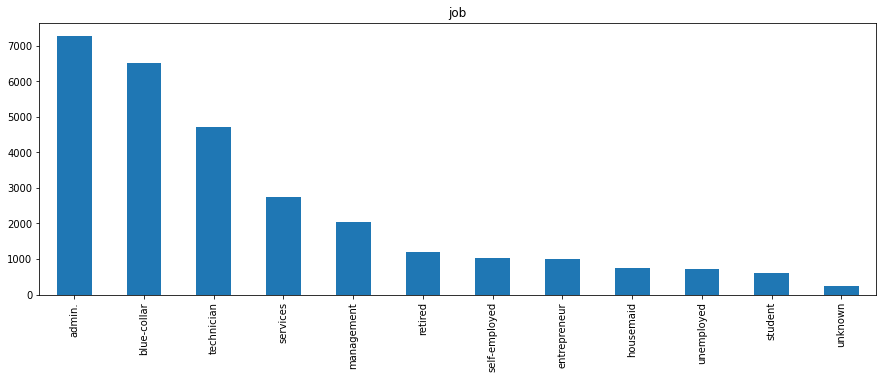

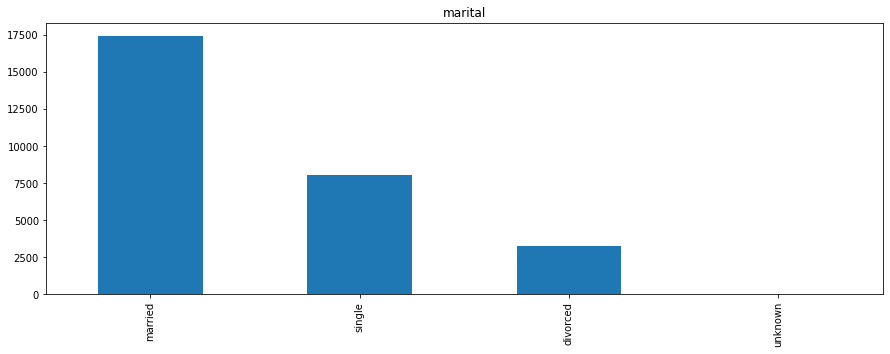

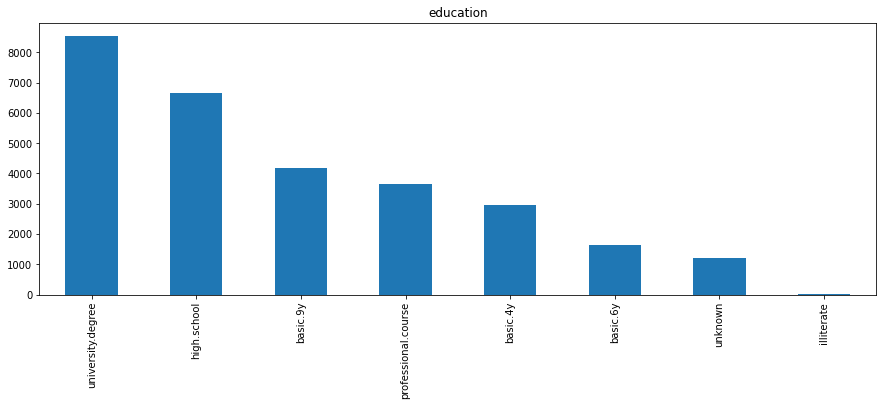

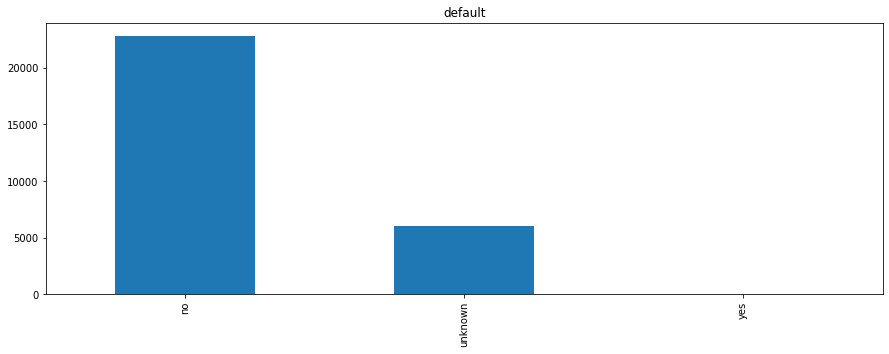

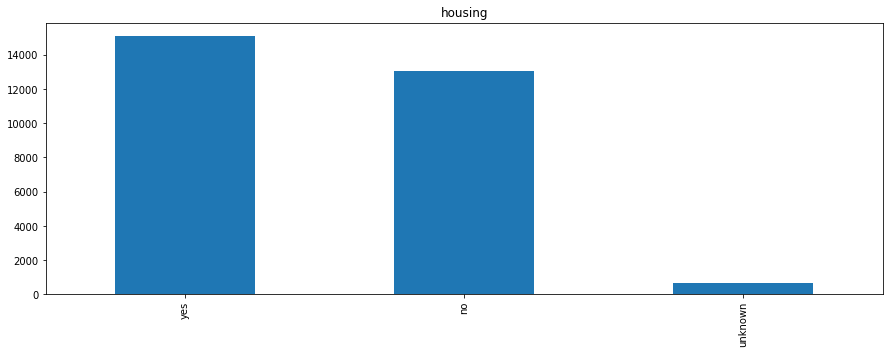

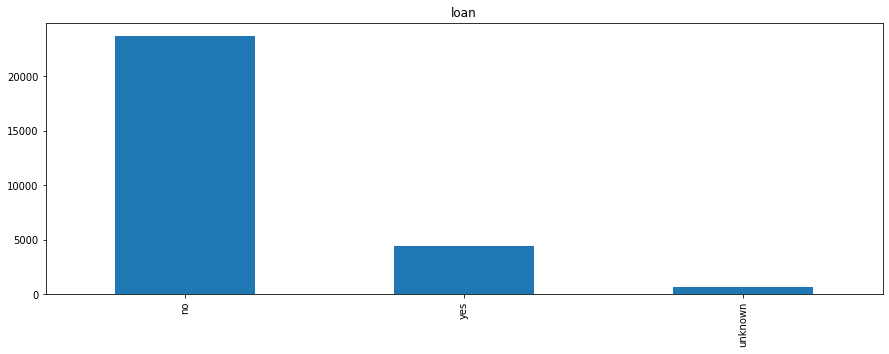

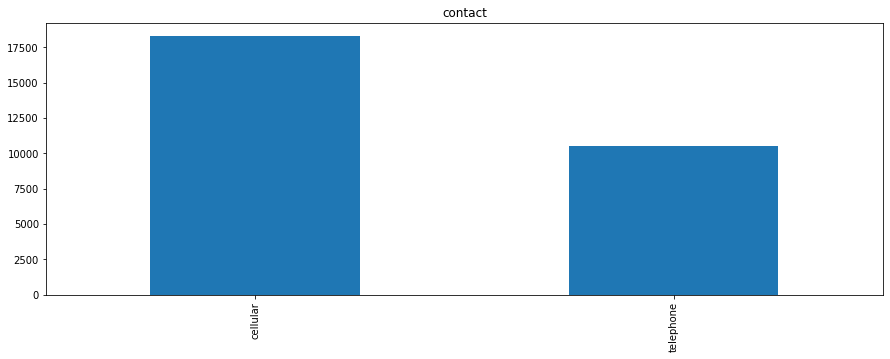

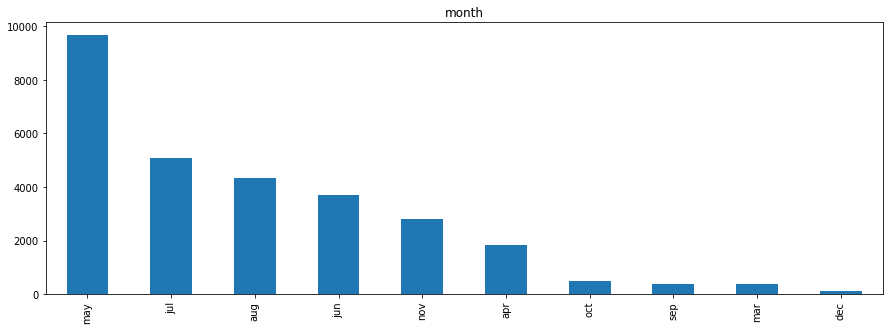

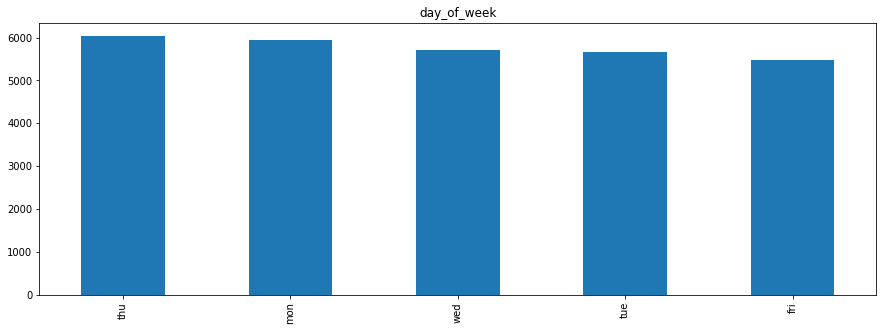

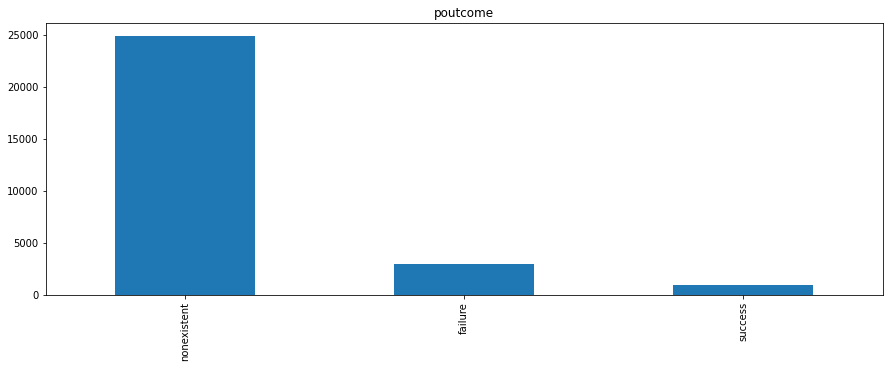

In [16]:
# Show the number of each value in each features by bar charts
for col in object_cols:
    X_train[col].value_counts().plot(kind='bar', figsize=(15,5))
    plt.title(col)
    plt.show()

**Input Categorical feature observations**
- Job: Most bank's customers have job types of Admin, blue-color and technician. It means bank targets high salaried people.
- Marital: High proportion of customers are married
- Education: more clients had university degree. Obviously, people having university degree have higher salaries
- Default: Most clients do not have credit default, it means they can be approached
- Housing: We must give more importance on clients who do not have housing loan
- Loan: We must give more importance on customers who do not have personal loan
- Month: May seems to be the busy month of the bank
- Day_of_week: everyday seems to be busy
- Contact: The number of customers which the bank had contacted through cellular were doubled those which the bank had contacted through telephone
- poutcome: the success rate of the previous campaign is small


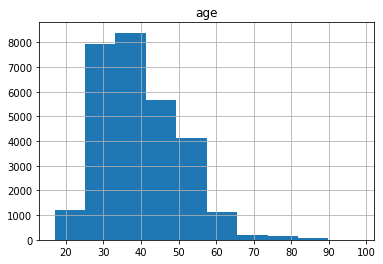

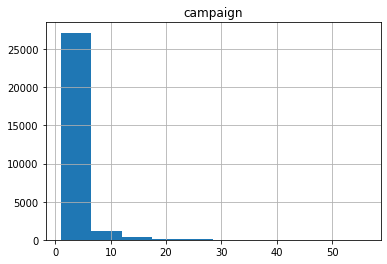

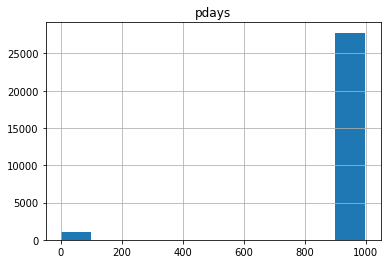

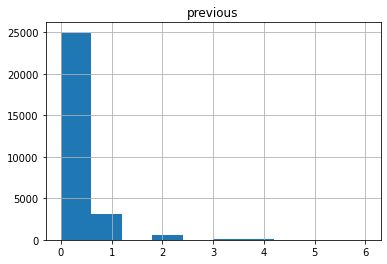

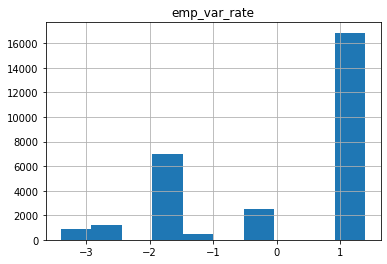

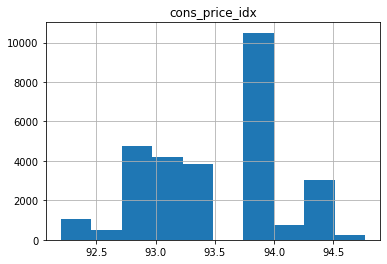

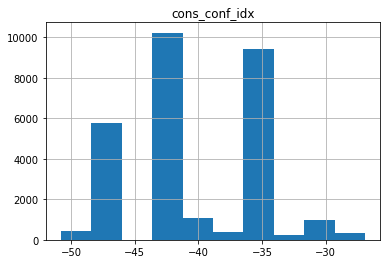

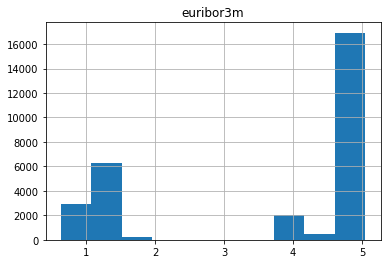

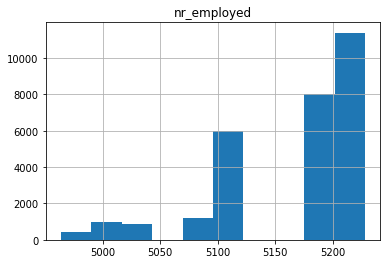

In [17]:
# Show histograms of numerical columns:
for col in numerical_cols:
    X_train[col].hist()
    plt.title(col)
    plt.show()

**Input numerical feature observations**
- Age: More clients are in 30-40 years old
- Campaign: Bank contacted to clients around 1-5 times in this campaign
- pdays: After the previous campaign, most clients were not contacted
- previous: In the previous campaign, most customers were contacted less than 1 time
- emp_var_rate: More quarters saw the increase in employment compared to the previous quarters
- cons_price_idx: The price of consumer good and services decreased
- cons_conf_idx: Consumers had the negative opinions about future developments of households' consumption and saving
- euribor3m: Banks lend money to one another with a maturity of 3 months with the interest rate of nearly 5%

#### 2D analysis

In [18]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
10018,27,admin.,married,university.degree,no,no,no,cellular,aug,thu,3,6,1,success,-1.7,94.027,-38.3,0.899,4991.6,1
29878,33,management,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.040,4963.6,1
11522,52,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,tue,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
16354,33,services,single,basic.6y,unknown,yes,yes,telephone,may,wed,8,999,1,failure,-1.8,92.893,-46.2,1.281,5099.1,0
26636,59,retired,married,unknown,unknown,yes,no,telephone,jun,thu,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0


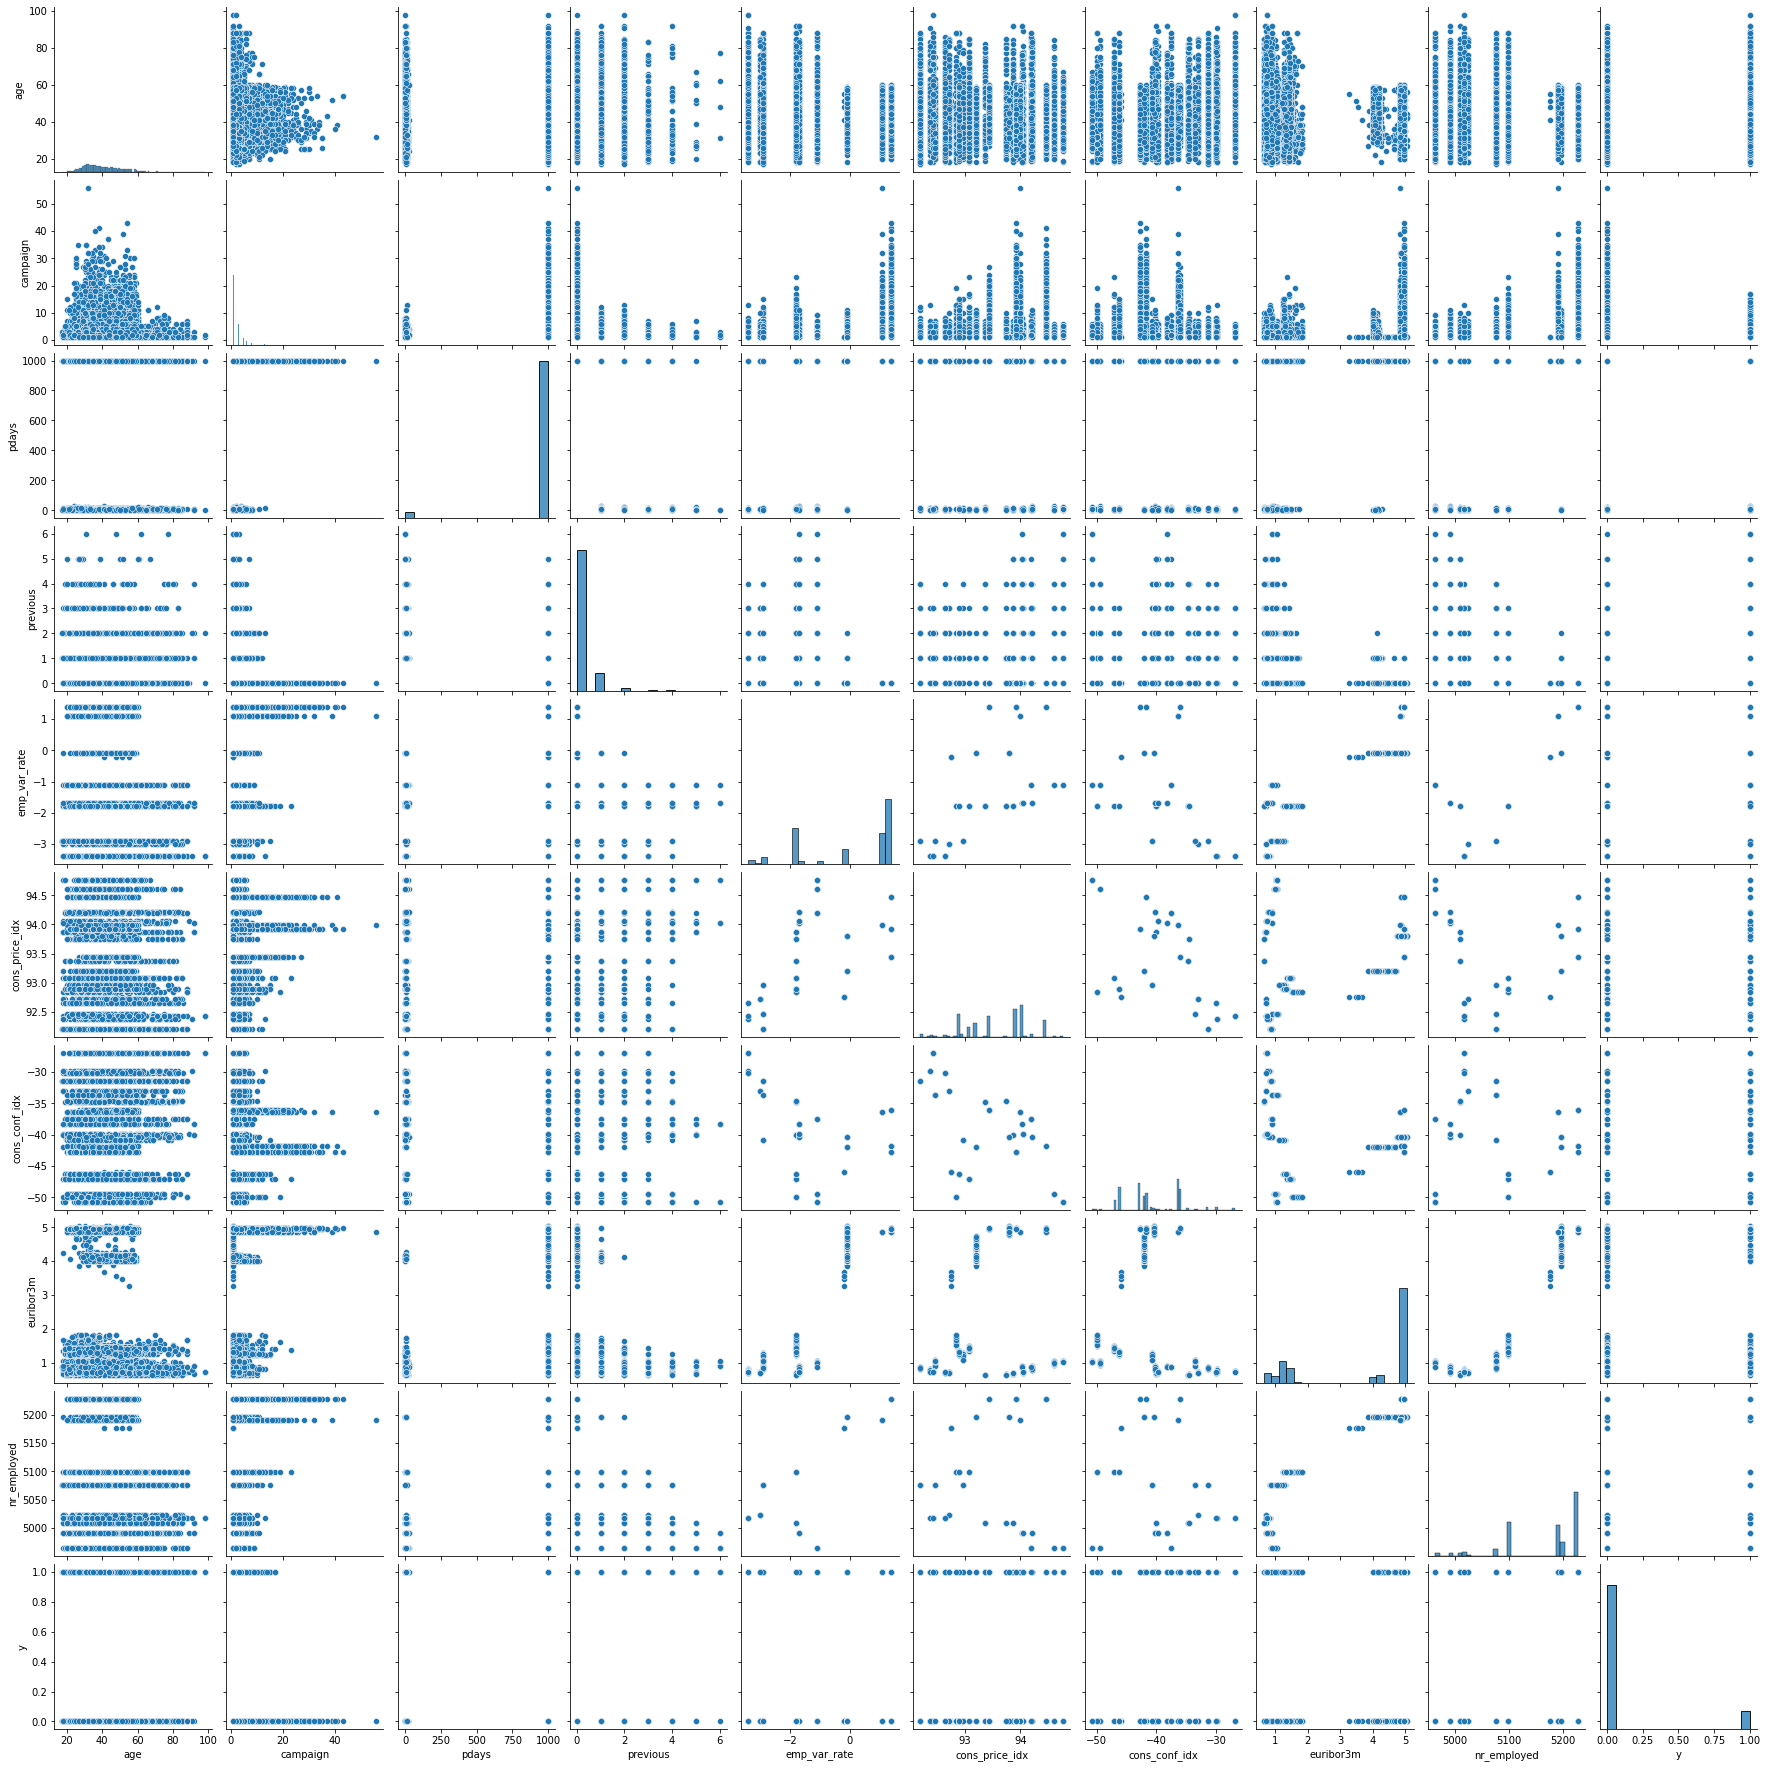

In [19]:
sns.pairplot(train_data)

In the pairplot, we can see the correlation between 'campaign' feature and outcome variables that when the values of campaign, which is the number of contact to customers during the campaign, are more than 20, the customers are more likely not to subscribe the term deposit.

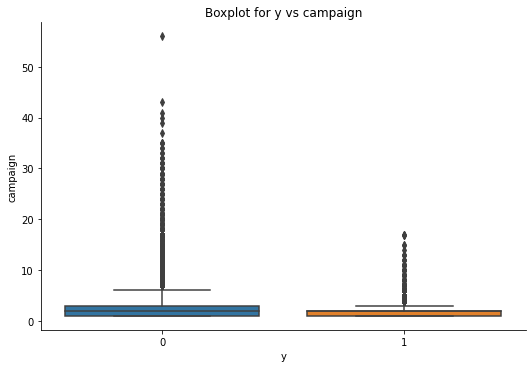

In [20]:
sns.catplot(x="y", y="campaign", data=train_data, kind="box", aspect=1.5)
plt.title("Boxplot for y vs campaign")
plt.show()

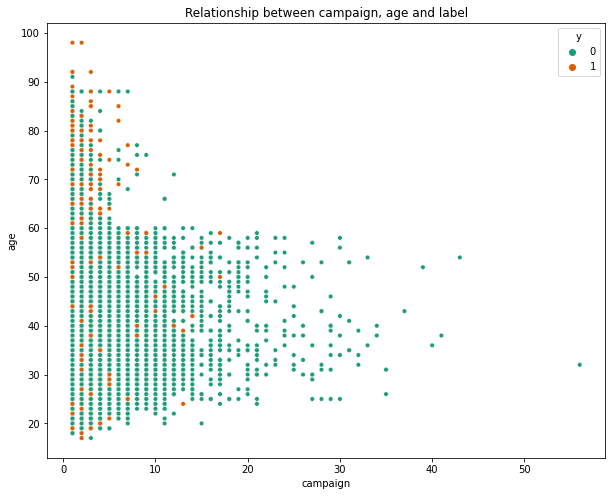

In [21]:
# Scatter plots of campaign and age according to outcome variable(0/1)
plt.figure(figsize=(10,8))
sns.scatterplot(x="campaign", y="age", hue="y", data=train_data, palette="Dark2", s=20)
plt.title("Relationship between campaign, age and label")
plt.show()

- We can see that the bank just needed to contact to elderly people (>60 years old) or younf people (<30 years old) around fewer than 8-10 times, these people would purchase the term deposit. So bank did not need to contact them anymore
- Few people in their 30s to 50s years old subscribe the term deposit. When the customers were not willing to purchase the term deposit, bank had to contact them a lot of time (>20 times)

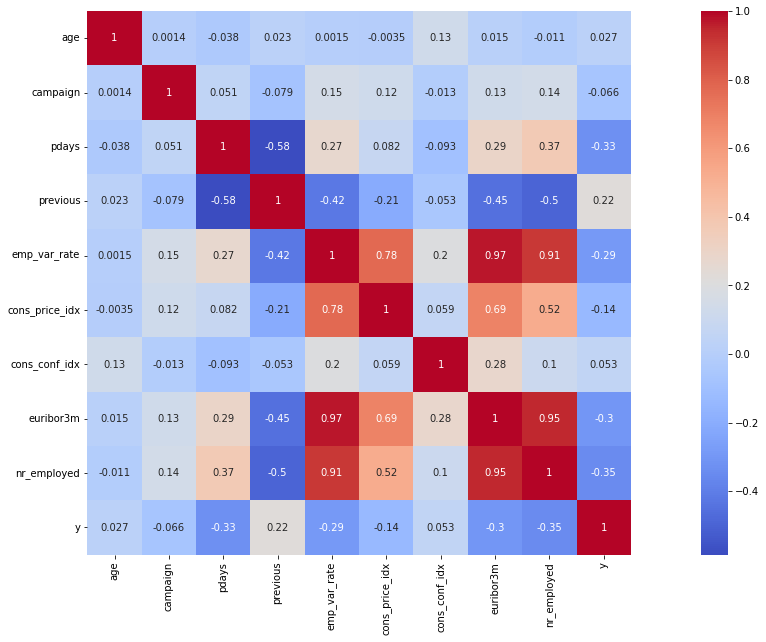

In [22]:
#Show correlations between features by using Heat map method

correlations = train_data.corr(method = 'pearson')
plt.figure(figsize = (25,10))
sns.heatmap(correlations, vmax = 1, square = True, annot= True, cmap='coolwarm')
plt.show()

- I observed the strong positive relationship between euribor3m and emp.var.rate with correlation of 97%.
- Also the same emp.var.rate attribute has a strong positive correlation with nr_employed at 0.91 and cons_price_idx at 0.78
- euribor3m and nr_employed features have a strong positive correlation (0.95)

#### More exploration of the average of continuous features according to each value of categorical features

In [23]:
data.groupby('y').mean()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,
0,39.911185,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [24]:
data.groupby('job').mean()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,
admin.,38.187296,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [25]:
data.groupby('marital').mean()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,
divorced,44.899393,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [26]:
data.groupby('education').mean()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,
basic.4y,47.596504,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic.6y,40.448953,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
basic.9y,39.061208,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,37.998213,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


In [27]:
job_crosstab = pd.crosstab(train_data['job'], train_data['y'], margins = True, margins_name = "Total")
job_crosstab

y,0,1,Total
job,,,
admin.,6344,937,7281
blue-collar,6058,454,6512
entrepreneur,922,90,1012
housemaid,682,70,752
management,1826,224,2050
retired,900,298,1198
self-employed,921,104,1025
services,2510,233,2743
student,427,191,618


In [28]:
job_crosstab[0] = job_crosstab[0]/job_crosstab[0]['Total']
job_crosstab[1] = job_crosstab[1]/job_crosstab[1]['Total']

In [29]:
job_crosstab

y,0,1,Total
job,,,
admin.,0.247919,0.289019,7281
blue-collar,0.236742,0.140037,6512
entrepreneur,0.036031,0.027761,1012
housemaid,0.026652,0.021592,752
management,0.071359,0.069093,2050
retired,0.035171,0.091919,1198
self-employed,0.035992,0.032079,1025
services,0.098089,0.071869,2743
student,0.016687,0.058914,618


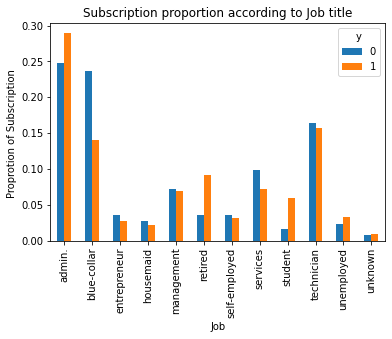

In [30]:
job_crosstab.drop(['Total'], axis=1).drop(['Total'], axis=0).plot(kind = 'bar')
plt.title('Subscription proportion according to Job title')
plt.xlabel('Job')
plt.ylabel('Proprotion of Subscription ')
plt.show()

The frequency of subscription of the deposit depends much on the job title. Thus, the job title can be a good predictor of the outcome variable.

In [31]:
marital_crosstab = pd.crosstab(data['marital'], data['y'])
marital_crosstab

y,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


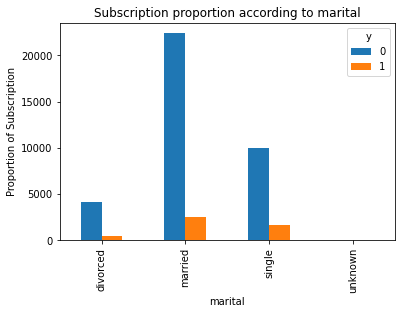

In [32]:
marital_crosstab.plot(kind = 'bar')
plt.xlabel('marital')
plt.ylabel('Proportion of Subscription')
plt.title('Subscription proportion according to marital')
plt.show()

Marial status of customers seems not to affect the frequency of purchase of the deposit. Therefore, marial feature is not a good predictor for the outcome variable.

In [33]:
education_crosstab = pd.crosstab(data['education'], data['y'])
education_crosstab_pct = education_crosstab.div(education_crosstab.sum(1), axis = 0)
education_crosstab_pct

y,0,1
education,,
basic.4y,0.897510,0.102490
basic.6y,0.917976,0.082024
basic.9y,0.921754,0.078246
high.school,0.891645,0.108355
illiterate,0.777778,0.222222
professional.course,0.886515,0.113485
university.degree,0.862755,0.137245
unknown,0.854997,0.145003


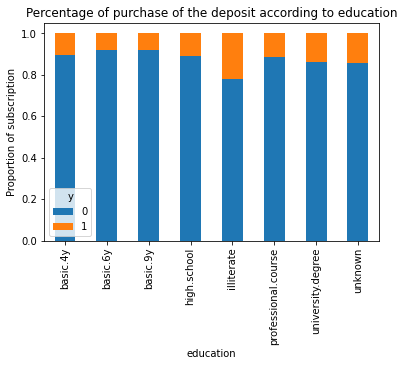

In [34]:
education_crosstab_pct.plot(kind = 'bar', stacked = True)
plt.xlabel('education')
plt.ylabel('Proportion of subscription')
plt.title('Percentage of purchase of the deposit according to education')
plt.show()


Education feature is a good predictor for the frequency of deposit subscription

In [35]:
month_crosstab = pd.crosstab(data['month'], data['y'])
month_crosstab_pct = month_crosstab.div(month_crosstab.sum(1), axis = 0)
month_crosstab_pct

y,0,1
month,,
apr,0.795213,0.204787
aug,0.893979,0.106021
dec,0.510989,0.489011
jul,0.909534,0.090466
jun,0.894885,0.105115
mar,0.494505,0.505495
may,0.935653,0.064347
nov,0.898561,0.101439
oct,0.561281,0.438719


<AxesSubplot:xlabel='month'>

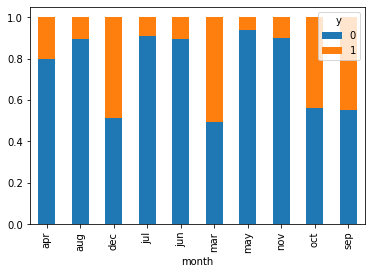

In [36]:
month_crosstab_pct.plot(kind = 'bar', stacked = True)

Month feature may be a good predictor for the outcome variable

In [37]:
day_of_week_crosstab = pd.crosstab(data['day_of_week'], data['y'])
day_of_week_crosstab_pct = day_of_week_crosstab.div(day_of_week_crosstab.sum(1), axis = 0)
day_of_week_crosstab_pct

y,0,1
day_of_week,,
fri,0.891913,0.108087
mon,0.900517,0.099483
thu,0.878812,0.121188
tue,0.882200,0.117800
wed,0.883329,0.116671


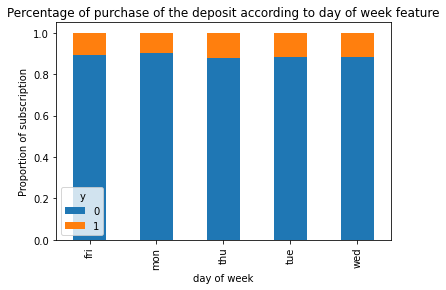

In [38]:
day_of_week_crosstab_pct.plot(kind = 'bar', stacked = True)
plt.xlabel('day of week')
plt.ylabel('Proportion of subscription')
plt.title('Percentage of purchase of the deposit according to day of week feature')
plt.show()

Day of week feature doesn't seem to be a good predictor for the outcome variable

In [39]:
poutcome_crosstab = pd.crosstab(data['poutcome'], data['y'])
poutcome_crosstab_pct = poutcome_crosstab.div(poutcome_crosstab.sum(1), axis = 0)
poutcome_crosstab_pct

y,0,1
poutcome,,
failure,0.857714,0.142286
nonexistent,0.911678,0.088322
success,0.348871,0.651129


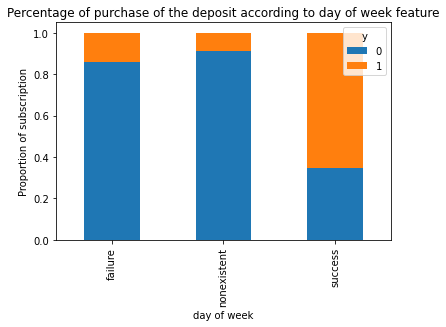

In [40]:
poutcome_crosstab_pct.plot(kind = 'bar', stacked = True)
plt.xlabel('day of week')
plt.ylabel('Proportion of subscription')
plt.title('Percentage of purchase of the deposit according to day of week feature')
plt.show()

poutcome seems to be a good predictor of the outcome variable

### Pre-process data

#### One hot encoding

In [41]:
for var in object_cols:    
    just_dummies = pd.get_dummies(X_train[var], prefix = var)
    X_train_1 = pd.concat([X_train, just_dummies], axis = 1)
    X_train = X_train_1
X_train_dummies = pd.DataFrame(X_train)
X_train_dummies.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
10018,27,admin.,married,university.degree,no,no,no,cellular,aug,thu,3,6,1,success,-1.7,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
29878,33,management,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,...,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
11522,52,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,tue,2,999,0,nonexistent,1.1,...,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
16354,33,services,single,basic.6y,unknown,yes,yes,telephone,may,wed,8,999,1,failure,-1.8,...,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
26636,59,retired,married,unknown,unknown,yes,no,telephone,jun,thu,1,999,0,nonexistent,1.4,...,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [42]:
list_colname = X_train_dummies.columns.tolist()
print(list_colname)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct

In [43]:
keep_col = [i for i in list_colname if i not in object_cols]
print(keep_col)

['age', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed

In [44]:
X_train = X_train_dummies[keep_col]
X_train.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
10018,27,3,6,1,-1.7,94.027,-38.3,0.899,4991.6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
29878,33,2,999,0,-1.1,94.767,-50.8,1.040,4963.6,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
11522,52,2,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
16354,33,8,999,1,-1.8,92.893,-46.2,1.281,5099.1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
26636,59,1,999,0,1.4,94.465,-41.8,4.961,5228.1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


#### Oversampling using SMOTE 

Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11.We will do oversampling by using SMOTE method

In [45]:
count_no_sub = len(y_train[y_train['y'] == 0])
count_sub = len(y_train[y_train['y'] == 1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print('percentage of no subscription is', pct_of_no_sub*100)
print('percentageof subscription is', pct_of_sub*100)

percentage of no subscription is 88.75515937705941
percentageof subscription is 11.244840622940584


In [46]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0,k_neighbors = 5)
columns = X_train.columns
os_data_X, os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data = os_data_X, columns = columns)
os_data_y = pd.DataFrame(data = os_data_y, columns = ['y'])
print(os_data_X.head())
print(os_data_y.head())

   age  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
0   27         3      6         1          -1.7          94.027   
1   33         2    999         0          -1.1          94.767   
2   52         2    999         0           1.1          93.994   
3   33         8    999         1          -1.8          92.893   
4   59         1    999         0           1.4          94.465   

   cons_conf_idx  euribor3m  nr_employed  job_admin.  job_blue-collar  \
0          -38.3      0.899       4991.6           1                0   
1          -50.8      1.040       4963.6           0                0   
2          -36.4      4.857       5191.0           0                1   
3          -46.2      1.281       5099.1           0                0   
4          -41.8      4.961       5228.1           0                0   

   job_entrepreneur  job_housemaid  job_management  job_retired  ...  \
0                 0              0               0            0  ...   
1             

In [47]:
# Check the number of our data
print("length of oversampled data is", len(os_data_X))
print("Number of no subscription in oversampled data", len(os_data_y[os_data_y['y']==1]))
print("Number of subscription in oversampled data", len(os_data_y[os_data_y['y'] == 1]))
print("Proportion of no subscription data in oversampled data is", 
     len(os_data_y[os_data_y['y']==0])/len(os_data_y))
print("Proportion of subscription data in oversampled data is", 
     len(os_data_y[os_data_y['y']==1])/len(os_data_y))

length of oversampled data is 51178
Number of no subscription in oversampled data 25589
Number of subscription in oversampled data 25589
Proportion of no subscription data in oversampled data is 0.5
Proportion of subscription data in oversampled data is 0.5


### Models

#### Logistic Regression Model Fitting

In [48]:
from sklearn.linear_model import LogisticRegression

## train a logistic model
logistic_model = LogisticRegression(random_state=2023)
logistic_model.fit(X_train, y_train)

print("coefficients:", logistic_model.coef_)
print("intercept:", logistic_model.intercept_)

coefficients: [[ 2.95185833e-03  2.56353364e-02 -1.56809840e-03 -8.68535777e-02
  -1.31823998e-01  3.65523734e-01  2.93047404e-02 -1.76163452e-01
  -6.49513910e-03  4.01638604e-02 -7.72185941e-02 -3.84742456e-03
  -4.82639229e-03 -8.06623031e-03  3.51005059e-02 -7.47382873e-04
  -1.97777531e-02  2.68857128e-02  1.07315085e-02  3.95997975e-03
   6.27755470e-04 -8.47506883e-03 -4.92098331e-02  5.82638925e-02
   2.40655500e-03 -1.46038638e-02 -1.15855500e-02 -3.45573087e-02
  -5.32124888e-03  1.54167972e-04 -1.10409589e-03  6.05210084e-02
   9.48243652e-03  7.40935721e-02 -7.10327731e-02 -7.52534640e-05
   8.32746538e-03 -3.99070727e-03 -1.35121254e-03  1.33868202e-02
  -3.99070727e-03 -6.41056731e-03  1.16581085e-01 -1.13595540e-01
   3.04771089e-02  2.84635803e-02  9.20058734e-03  9.18921882e-02
   4.34127069e-02  6.32546870e-02 -2.57806861e-01 -2.98838184e-02
   2.08087281e-02  3.16663804e-03  6.18180086e-03 -4.13092719e-02
   1.63653489e-02  3.26025252e-03  1.84874152e-02 -9.72417423e

In [49]:
## convert categorical features to one-hot for test set
for var in object_cols:    
    just_dummies = pd.get_dummies(X_test[var], prefix = var)
    X_test_1 = pd.concat([X_test, just_dummies], axis = 1)
    X_test = X_test_1
X_test_dummies = pd.DataFrame(X_test)
X_test_dummies.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
18092,85,housemaid,married,basic.4y,unknown,yes,no,cellular,apr,tue,1,6,2,success,-1.8,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
27633,52,admin.,single,university.degree,no,yes,no,cellular,aug,fri,4,999,0,nonexistent,1.4,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
25049,35,blue-collar,single,basic.9y,unknown,yes,no,cellular,jul,tue,5,999,0,nonexistent,1.4,...,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
38575,33,technician,married,professional.course,no,yes,no,cellular,aug,tue,10,999,0,nonexistent,1.4,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
11400,26,services,single,high.school,no,no,no,telephone,jun,fri,1,999,0,nonexistent,1.4,...,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


In [50]:
## get rid of original categorial features, only keep the new one-hot columns
list_colname = X_test_dummies.columns.tolist()
keep_col = [i for i in list_colname if i not in object_cols]
X_test = X_test_dummies[keep_col]
X_test.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
18092,85,1,6,2,-1.8,93.749,-34.6,0.642,5008.7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
27633,52,4,999,0,1.4,93.444,-36.1,4.964,5228.1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
25049,35,5,999,0,1.4,93.918,-42.7,4.961,5228.1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
38575,33,10,999,0,1.4,93.444,-36.1,4.966,5228.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
11400,26,1,999,0,1.4,94.465,-41.8,4.967,5228.1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


In [51]:
from collections import Counter
## predict on test set
y_pred_logistic = logistic_model.predict(X_test) 
Counter(y_pred_logistic)  ## check on the prediction to see how many 0, 1

Counter({1: 413, 0: 11944})

In [52]:
## we can also get the raw prediction in terms of probability
y_prob_pred_logistic = logistic_model.predict_proba(X_test)[:,1]
y_prob_pred_logistic

array([0.72654972, 0.0605566 , 0.04381564, ..., 0.05270429, 0.05249725,
       0.04613868])

<AxesSubplot:ylabel='Count'>

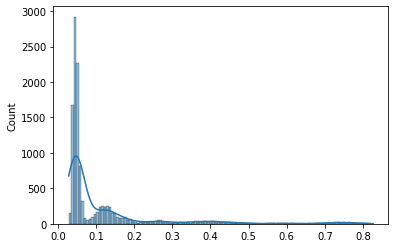

In [53]:
## visualize the prediction on test set
sns.histplot(y_prob_pred_logistic, kde = True)

#### Decision tree

In [54]:
from sklearn import tree

## train a decision tree model
decision_tree = tree.DecisionTreeClassifier(max_depth = 4)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

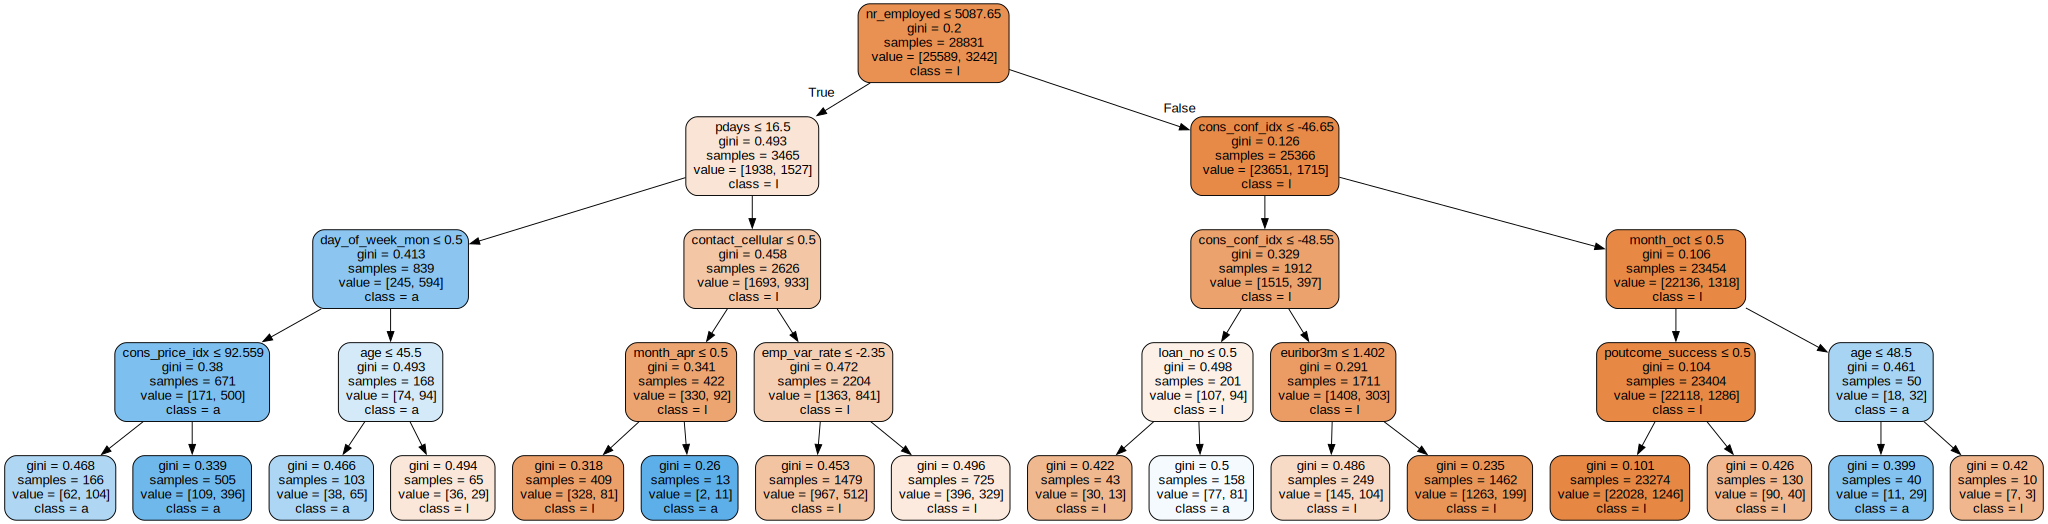

In [55]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dot_data = export_graphviz(decision_tree, out_file=None, feature_names=X_train.columns,
                           class_names="label", filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree") # save the graph to a file 
graph

In [56]:
## get raw probability for the prediction
y_prob_pred_tree = decision_tree.predict_proba(X_test)[:,1]
y_prob_pred_tree

array([0.78415842, 0.05353613, 0.05353613, ..., 0.05353613, 0.05353613,
       0.05353613])

In [57]:
## predicted labels on test set
y_pred_tree = decision_tree.predict(X_test)
Counter(y_pred_tree)  ## check to see how many data points classified as 0 and 1

Counter({1: 442, 0: 11915})

<AxesSubplot:ylabel='Count'>

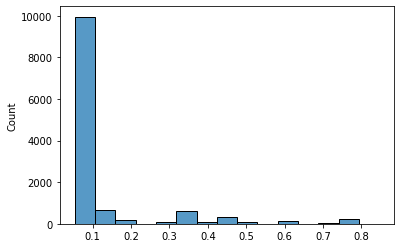

In [58]:
## show distribution of the prediction on test set
sns.histplot(y_prob_pred_tree)

#### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier


# Initialize the classifier
random_forest = RandomForestClassifier(n_jobs=-1, n_estimators=500, random_state=2023, max_depth=4,
                             max_features=int(0.5*len(keep_col)), max_samples=0.6)

# Fit the classifier to the data
random_forest.fit(X_train, y_train)


## raw prediction  (probability) on test set
y_prob_pred_random_forest = random_forest.predict_proba(X_test)[:,1]


# Make predictions on new data
y_pred_random_forest = random_forest.predict(X_test)

<AxesSubplot:ylabel='Count'>

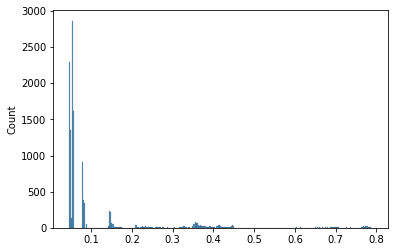

In [60]:
## show distribution of raw predictions 
sns.histplot(y_prob_pred_random_forest)

#### Light GBM

In [61]:
## For lightGBM, we don't need to use one-hot encoder to convert categorial columns
# Instead, I will use label encoder to encode these features.

In [62]:
X_train_lgb = X_train_original
X_test_lgb = X_test_original

In [63]:
## Using label encoder to preprocess categorical columns for LightGBM model

from sklearn import preprocessing

cate_cols = []
for c in X_train_lgb.columns:
    col_type = X[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        le = preprocessing.LabelEncoder()
        X_train_lgb[c] = le.fit_transform(X_train_lgb[c])
        X_test_lgb[c] = le.fit_transform(X_test_lgb[c])
        cate_cols.append(c)


In [64]:
import lightgbm as lgb

# Create the dataset for LightGBM
lgb_train = lgb.Dataset(X_train_lgb, y_train)


# Define the hyperparameters for the model
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'max_depth': -1,
    'learning_rate': 0.01,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.7,
    'bagging_freq': 1,
    'verbose':0,
    'scale_pos_weight': 2
}

# Train the model
light_gbm = lgb.train(params, lgb_train, num_boost_round=200, valid_sets=lgb_train )

# Make predictions on the test data
y_prob_pred_lgbm = light_gbm.predict(X_test_lgb)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	training's binary_logloss: 0.348763
[2]	training's binary_logloss: 0.34622
[3]	training's binary_logloss: 0.343701
[4]	training's binary_logloss: 0.341432
[5]	training's binary_logloss: 0.339235
[6]	training's binary_logloss: 0.337107
[7]	training's binary_logloss: 0.335101
[8]	training's binary_logloss: 0.333166
[9]	training's binary_logloss: 0.331399
[10]	training's binary_logloss: 0.329693
[11]	training's binary_logloss: 0.328107
[12]	training's binary_logloss: 0.326588
[13]	training's binary_logloss: 0.325102
[14]	training's binary_logloss: 0.323664
[15]	training's binary_logloss: 0.322337
[16]	training's binary_logloss: 0.320996
[17]	training's binary_logloss: 0.319769
[18]	training's binary_logloss: 0.318547
[19]	training's binary_logloss: 0.317368
[2

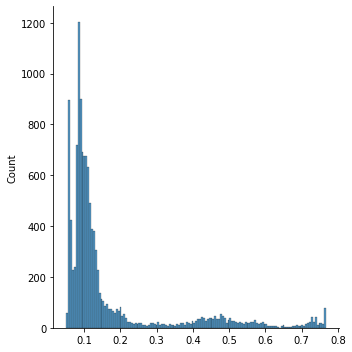

In [65]:
sns.displot(y_prob_pred_lgbm)

In [66]:
thres = 0.5
y_pred_lgbm = y_prob_pred_lgbm > thres
y_pred_lgbm = y_pred_lgbm.astype(int)  ## convert bool to int
Counter(y_pred_lgbm) # check on how many observations for each class that we predict

Counter({1: 865, 0: 11492})

#### KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Create KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

scaler = StandardScaler()

## KNN is very sensitive to scale of the features. 
# We will normalize the data before fitting into KNN model
X_train_knn = scaler.fit_transform(X_train)
X_test_knn = scaler.transform(X_test)

# Fit the classifier to the data
knn.fit(X_train_knn, y_train)


# Make predictions on the testing data
y_pred_knn = knn.predict(X_test_knn)

# Get probability predictions on the test set
y_prob_pred_knn = knn.predict_proba(X_test)[:,1]

<AxesSubplot:ylabel='Count'>

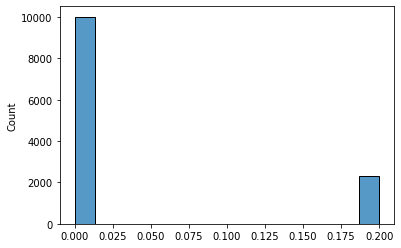

In [68]:
## show distribution of the prediction on test set
sns.histplot(y_prob_pred_knn)

#### Neural Network

In [141]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

# Define a neural network 
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
    
    def predict(self, X_test, return_proba=False):
        dataset = TabularDataset(X_test, torch.randn(len(X_test)))
        test_loader = DataLoader(dataset, batch_size=32, shuffle=False)
        self.eval()
        thres = 0.5
        preds = []
        with torch.no_grad():
            for data in test_loader:
                inputs, _ = data
                outputs = model(inputs)
                if return_proba:
                    pred = torch.sigmoid(outputs)
                else:
                    pred = torch.sigmoid(outputs) > thres
                preds.extend(pred.numpy())
        res = [float(x[0]) for x in preds]
        return res


In [142]:
# Define the dataset class
class TabularDataset(Dataset):
    def __init__(self, data, targets):
        self.data =data
        self.targets = targets

    def __getitem__(self, index):
        x = torch.tensor(self.data[index], dtype=torch.float32)
        y = torch.tensor(self.targets[index], dtype=torch.float32)
        return x, y

    def __len__(self):
        return len(self.data)

    
# Define the training loop
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1} loss: {running_loss/len(train_loader)}")
    return model




In [143]:
##  Scale training set
scaler = StandardScaler()
X_train_neural_net = scaler.fit_transform(X_train.values)
y = y_train.values

In [144]:
# Create the dataset and dataloader
dataset = TabularDataset(X_train_neural_net, y)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Set up the neural network model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 16
output_size = 1  
model = Net(input_size, hidden_size, output_size)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [149]:
# Train the model
num_epochs = 10
neural_network = train_model(model, train_loader, criterion, optimizer, num_epochs=num_epochs)

Epoch 1 loss: 0.27848166441513883
Epoch 2 loss: 0.2756845578964754
Epoch 3 loss: 0.2742376173293419
Epoch 4 loss: 0.27326731836127655
Epoch 5 loss: 0.27206898509596084
Epoch 6 loss: 0.2713485070350234
Epoch 7 loss: 0.270490530688113
Epoch 8 loss: 0.26972946185581426
Epoch 9 loss: 0.26940203329897616
Epoch 10 loss: 0.26828680743569805


In [150]:
## prediction on test set
X_test_neural_net = scaler.transform(X_test.values)
y_pred_neural_net = neural_network.predict(X_test_neural_net)

<AxesSubplot:ylabel='Count'>

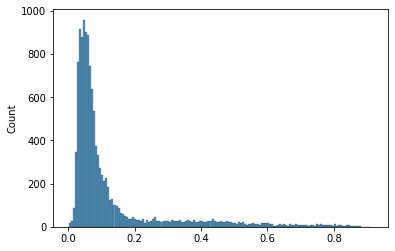

In [152]:
## show distribution of the prediction on test set
y_pred_proba_neural_net = neural_network.predict(X_test_neural_net, return_proba=True)
sns.histplot(y_pred_proba_neural_net)

### Evaluation

In [153]:
# Functions to compute accuracy, f1, recall, precision 

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,\
            classification_report, roc_auc_score, roc_curve, precision_score, recall_score, auc 

def f1_score_weighted(y_true, y_pred):
    return f1_score(y_true, y_pred, average="weighted")

def get_evaluation(X_dict, y_ground_truth):
    
    # Evaluate models
    models = {
        'Logistic Regression': logistic_model,
        'Decision Tree': decision_tree,
        'Random Forest': random_forest,
        'Light GBM': light_gbm,
        'KNN': knn,
        'Neural Network': neural_network
    }

    metrics = {
        'Accuracy': accuracy_score,
        'Precision': precision_score,
        'Recall': recall_score,
        'F1-Score': f1_score_weighted
    }

  
    results = []
    for model_name, model in models.items():
        row = [model_name]
        for metric_name, metric_func in metrics.items():
            y_pred = model.predict(X_dict[model_name])
            if model_name == 'Light GBM':
                thres = 0.5
                y_pred = y_pred > thres
                y_pred = y_pred.astype(int)
            score = metric_func(y_ground_truth.values.reshape(-1), y_pred)
            row.append(score)
        results.append(row)

    # store results as a Data Frame
    columns = ['Model'] + list(metrics.keys())
    performance_df = pd.DataFrame(results, columns=columns)

    return performance_df

#### Metrics report on Training set

In [154]:
X_train_dict = {
    'Logistic Regression': X_train,
    'Decision Tree': X_train,
    'Random Forest': X_train,
    'Light GBM': X_train_lgb,
    'KNN': X_train_knn,
    'Neural Network': X_train_neural_net
}
y_ground_truth = y_train

report_training_set = get_evaluation(X_train_dict, y_ground_truth)
report_training_set

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.899414,0.687912,0.193091,0.873358
1,Decision Tree,0.900975,0.696447,0.211598,0.876629
2,Random Forest,0.900142,0.717887,0.184454,0.872871
3,Light GBM,0.904963,0.628586,0.378470,0.894330
4,KNN,0.913218,0.714617,0.380012,0.901205
5,Neural Network,0.903437,0.661495,0.289328,0.886201


#### Metrics report on test set

In [155]:
X_test_dict = {
    'Logistic Regression': X_test,
    'Decision Tree': X_test,
    'Random Forest': X_test,
    'Light GBM': X_test_lgb,
    'KNN': X_test_knn,
    'Neural Network': X_test_neural_net
}
y_ground_truth = y_test

report_test_set = get_evaluation(X_test_dict, y_ground_truth)
report_test_set

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.900057,0.697337,0.206009,0.875026
1,Decision Tree,0.897548,0.649321,0.205293,0.873074
2,Random Forest,0.899086,0.698163,0.190272,0.872478
3,Light GBM,0.900542,0.597688,0.369814,0.890010
4,KNN,0.889698,0.523490,0.278970,0.874489
5,Neural Network,0.899409,0.620155,0.286123,0.882542


#### Confusion matrix for all models

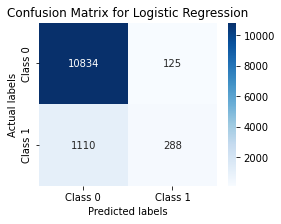

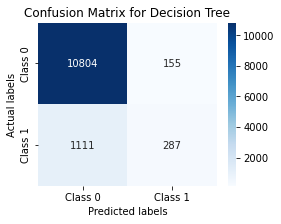

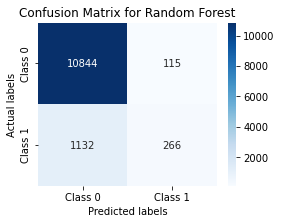

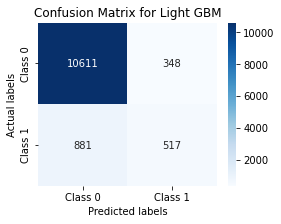

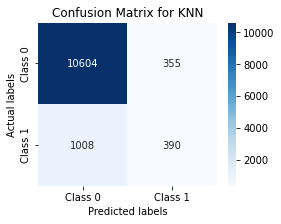

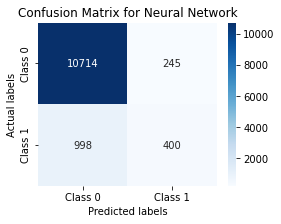

In [156]:
def plot_confusion_matrix(model_name, cm):
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted labels")
    plt.ylabel("Actual labels")
    plt.title("Confusion Matrix for {}".format(model_name))
    plt.show()

model_preds = {
    'Logistic Regression': y_pred_logistic,
    'Decision Tree': y_pred_tree,
    'Random Forest': y_pred_random_forest,
    'Light GBM': y_pred_lgbm,
    'KNN': y_pred_knn,
    'Neural Network': y_pred_neural_net
}
for model_name, y_pred in model_preds.items():
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(model_name, cm)
   

#### ROC  plots for all models

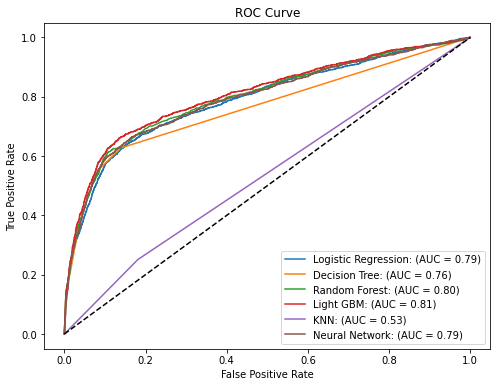

In [157]:
model_proba_reds = {
    'Logistic Regression': y_prob_pred_logistic,
    'Decision Tree': y_prob_pred_tree,
    'Random Forest': y_prob_pred_random_forest,
    'Light GBM': y_prob_pred_lgbm,
    'KNN': y_prob_pred_knn,
    'Neural Network': y_pred_proba_neural_net
}

plt.figure(figsize=(8, 6))
for model_name, y_pred in model_proba_reds.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name}: (AUC = {roc_auc:.2f})')
    

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### Explain model with SHAP

It is important to explain the results from machine learning models to understand why the models make that decision.
I will use SHAP values (SHapley Additive exPlanations), a method based on cooperative game theory, to explain LightGBM model.

In [81]:
import shap
shap.initjs()

In [82]:
explainer = shap.TreeExplainer(light_gbm)
shap_values = explainer.shap_values(X_train_lgb)

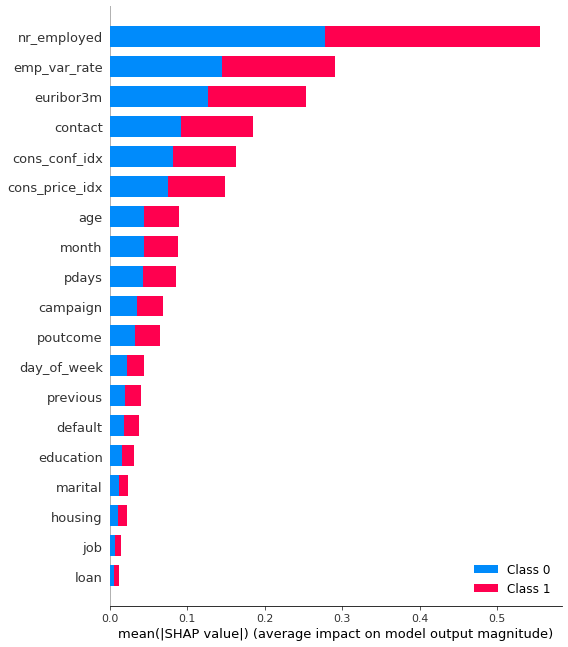

In [83]:
## Plot feature importance
shap.summary_plot(shap_values, X_train_lgb)


In [84]:
## Explain 1 observation
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_train_lgb.iloc[0,:])


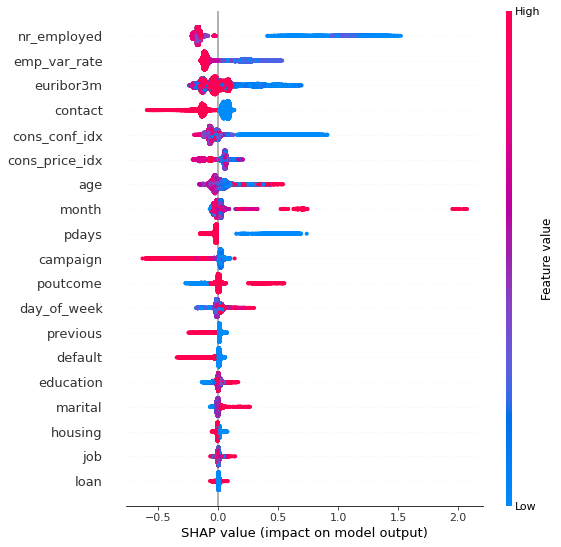

In [85]:
## We can stack all the beeswarm plots of all data points, to have an overview picture:
explainer_ = shap.Explainer(model, X_train_lgb)
shap_values_ = explainer(X_train_lgb)[:,:,1]

shap.plots.beeswarm(shap_values_, max_display=20)